<a href="https://colab.research.google.com/github/wahida-sci/XAI-Project/blob/main/XAI_SHAP_Customer_Churn_Transpose_ipynb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Data Dictionary

* Call Failures: number of call failures
* Complains: binary (0: No complaint, 1: complaint)
* Subscription Length: total months of subscription
* Charge Amount: Ordinal attribute (0: lowest amount, 9: highest amount)
* Seconds of Use: total seconds of calls
* Frequency of use: total number of calls
* Frequency of SMS: total number of text messages
* Distinct Called Numbers: total number of distinct phone calls
* Age Group: ordinal attribute (1: younger age, 5: older age)
* Tariff Plan: binary (1: Pay as you go, 2: contractual)
* Status: binary (1: active, 2: non-active)
* Churn: binary (1: churn, 0: non-churn) - Class label
* Customer Value: The calculated value of customer

In [ ]:
import shap
import pandas as pd
import numpy as np
shap.initjs()

customer = pd.read_csv("Customer Churn.csv")
customer.head(15)

,Call Failure,Complains,Subscription Length,Charge Amount,Seconds of Use,Frequency of use,Frequency of SMS,Distinct Called Numbers,Age Group,Tariff Plan,Status,Age,Customer Value,Churn
0,8,0,38,0,4370,71,5,17,3,1,1,30,197.640,0
1,0,0,39,0,318,5,7,4,2,1,2,25,46.035,0
2,10,0,37,0,2453,60,359,24,3,1,1,30,1536.520,0
3,10,0,38,0,4198,66,1,35,1,1,1,15,240.020,0
4,3,0,38,0,2393,58,2,33,1,1,1,15,145.805,0
5,11,0,38,1,3775,82,32,28,3,1,1,30,282.280,0
6,4,0,38,0,2360,39,285,18,3,1,1,30,1235.960,0
7,13,0,37,2,9115,121,144,43,3,1,1,30,945.440,0
8,7,0,38,0,13773,169,0,44,3,1,1,30,557.680,0
9,7,0,38,1,4515,83,2,25,3,1,1,30,191.920,0


In [ ]:
# Check data shape

customer.shape

(3150, 14)

In [ ]:
# Identify data type

customer.dtypes

,0
Call Failure,int64
Complains,int64
Subscription Length,int64
Charge Amount,int64
Seconds of Use,int64
Frequency of use,int64
Frequency of SMS,int64
Distinct Called Numbers,int64
Age Group,int64
Tariff Plan,int64


In [ ]:
customer.describe()

,Call Failure,Complains,Subscription Length,Charge Amount,Seconds of Use,Frequency of use,Frequency of SMS,Distinct Called Numbers,Age Group,Tariff Plan,Status,Age,Customer Value,Churn
count,3150.000000,3150.000000,3150.000000,3150.000000,3150.000000,3150.000000,3150.000000,3150.000000,3150.000000,3150.000000,3150.000000,3150.000000,3150.000000,3150.000000
mean,7.627937,0.076508,32.541905,0.942857,4472.459683,69.460635,73.174921,23.509841,2.826032,1.077778,1.248254,30.998413,470.972916,0.157143
std,7.263886,0.265851,8.573482,1.521072,4197.908687,57.413308,112.237560,17.217337,0.892555,0.267864,0.432069,8.831095,517.015433,0.363993
min,0.000000,0.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,15.000000,0.000000,0.000000
25%,1.000000,0.000000,30.000000,0.000000,1391.250000,27.000000,6.000000,10.000000,2.000000,1.000000,1.000000,25.000000,113.801250,0.000000
50%,6.000000,0.000000,35.000000,0.000000,2990.000000,54.000000,21.000000,21.000000,3.000000,1.000000,1.000000,30.000000,228.480000,0.000000
75%,12.000000,0.000000,38.000000,1.000000,6478.250000,95.000000,87.000000,34.000000,3.000000,1.000000,1.000000,30.000000,788.388750,0.000000
max,36.000000,1.000000,47.000000,10.000000,17090.000000,255.000000,522.000000,97.000000,5.000000,2.000000,2.000000,55.000000,2165.280000,1.000000


In [ ]:
# Check missing value
missing_values = customer.isnull().sum()

# Filter columns that have missing values
missing_columns = missing_values[missing_values > 0]

# Display columns with missing data and their counts
if not missing_columns.empty:
    print("Columns with missing values and their counts:")
    print(missing_columns)
else:
    print("No missing values found in the dataset.")

No missing values found in the dataset.


In [ ]:
print(customer["Churn"].value_counts(normalize=True)*100)

Churn
0    84.285714
1    15.714286
Name: proportion, dtype: float64


# Objective 1: EDA

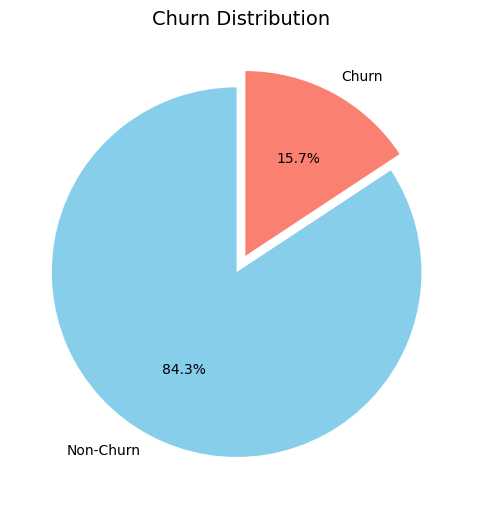

In [ ]:
import matplotlib.pyplot as plt

# Count values of Churn
churn_counts = customer["Churn"].value_counts()

# Pie chart
plt.figure(figsize=(6,6))
plt.pie(churn_counts,
        labels=churn_counts.index.map({0: "Non-Churn", 1: "Churn"}),
        autopct='%1.1f%%',
        startangle=90,
        colors=["skyblue", "salmon"],
        explode=(0.05, 0.05))  # slight separation for clarity
plt.title("Churn Distribution", fontsize=14)
plt.show()



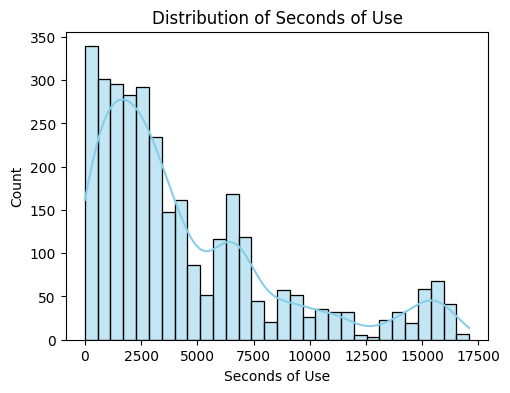

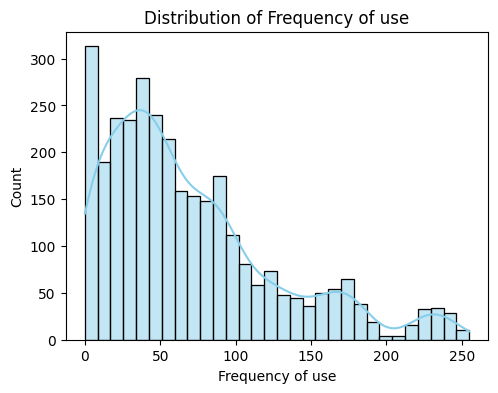

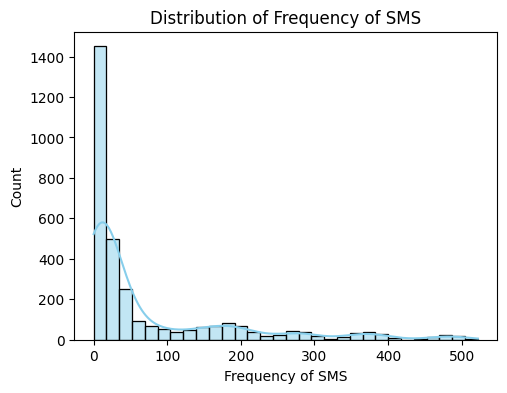

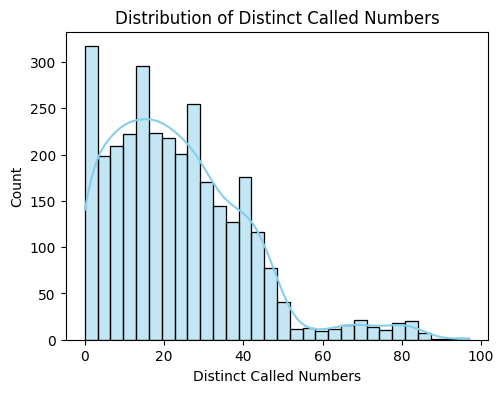

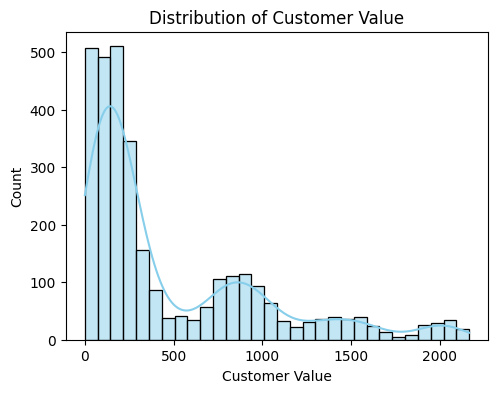

/tmp/ipython-input-3446313239.py:30: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=customer[col], palette="viridis")


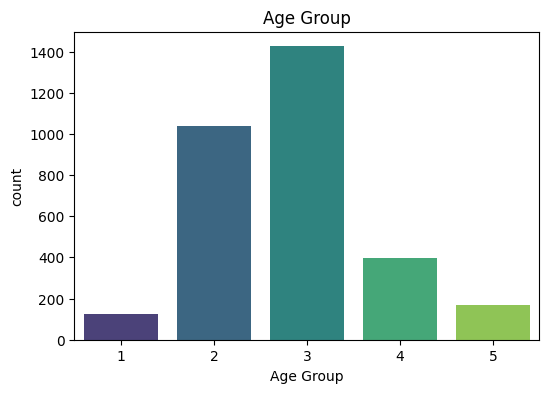

/tmp/ipython-input-3446313239.py:39: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=customer[col], palette="Set2")


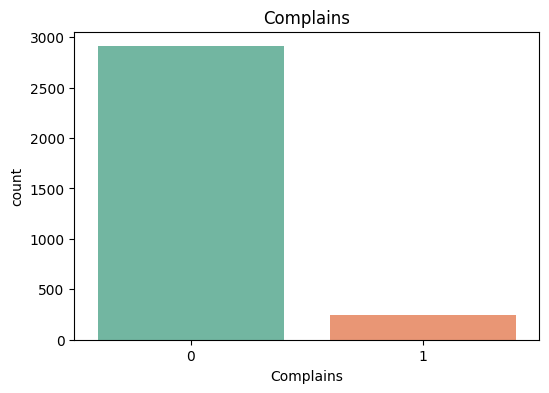

/tmp/ipython-input-3446313239.py:39: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=customer[col], palette="Set2")


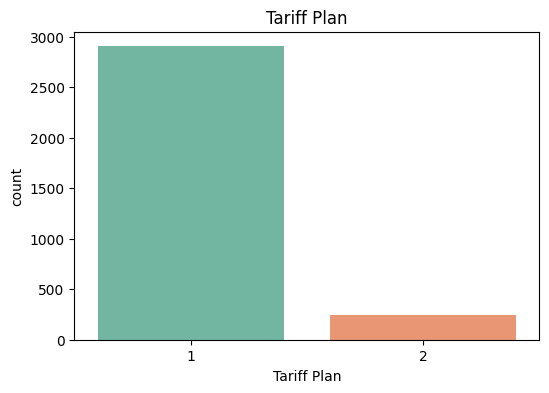

/tmp/ipython-input-3446313239.py:39: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=customer[col], palette="Set2")


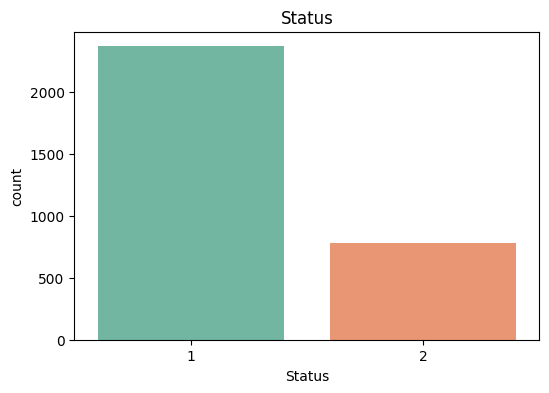

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Numeric features
numeric_features = ["Seconds of Use", "Frequency of use", "Frequency of SMS", "Distinct Called Numbers", "Customer Value"]

# Ordinal features
ordinal_features = ["Age Group"]

# Categorical features
categorical_features = ["Complains", "Tariff Plan", "Status"]

# -----------------------------
# 🔹 Numeric features: histograms
# -----------------------------
for col in numeric_features:
    plt.figure(figsize=(12,4))

    # Histogram
    plt.subplot(1,2,1)
    sns.histplot(customer[col], kde=True, bins=30, color="skyblue")
    plt.title(f"Distribution of {col}")
    plt.show()

# -----------------------------
# 🔹 Ordinal features: countplots
# -----------------------------
for col in ordinal_features:
    plt.figure(figsize=(6,4))
    sns.countplot(x=customer[col], palette="viridis")
    plt.title(f"{col}")
    plt.show()

# -----------------------------
# 🔹 Categorical features: bar plots
# -----------------------------
for col in categorical_features:
    plt.figure(figsize=(6,4))
    sns.countplot(x=customer[col], palette="Set2")
    plt.title(f"{col}")
    plt.show()


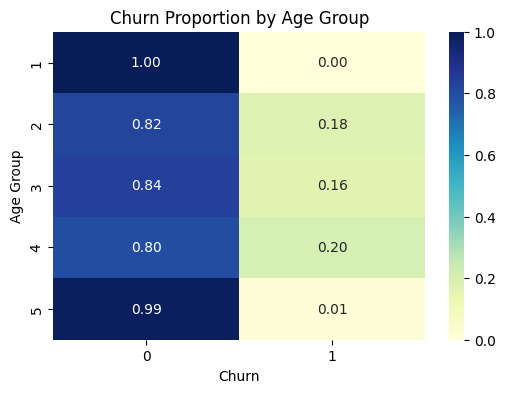

In [ ]:
crosstab = pd.crosstab(customer['Age Group'], customer['Churn'], normalize='index')
plt.figure(figsize=(6,4))
sns.heatmap(crosstab, annot=True, cmap="YlGnBu", fmt=".2f")
plt.title("Churn Proportion by Age Group")
plt.ylabel("Age Group")
plt.xlabel("Churn")
plt.show()

In [ ]:
# Group by AgeGroup and get min & max of Age
age_range = customer.groupby('Age Group')['Age'].agg(['min', 'max']).reset_index()

print(age_range)


   Age Group  min  max
0          1   15   15
1          2   25   25
2          3   30   30
3          4   45   45
4          5   55   55


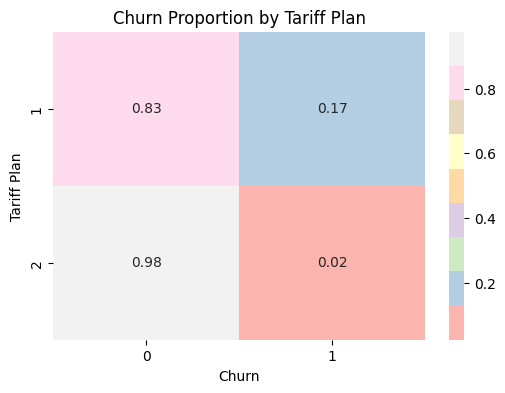

In [ ]:
crosstab = pd.crosstab(customer['Tariff Plan'], customer['Churn'], normalize='index')
plt.figure(figsize=(6,4))
sns.heatmap(crosstab, annot=True, cmap="Pastel1", fmt=".2f")
plt.title("Churn Proportion by Tariff Plan")
plt.ylabel("Tariff Plan")
plt.xlabel("Churn")
plt.show()

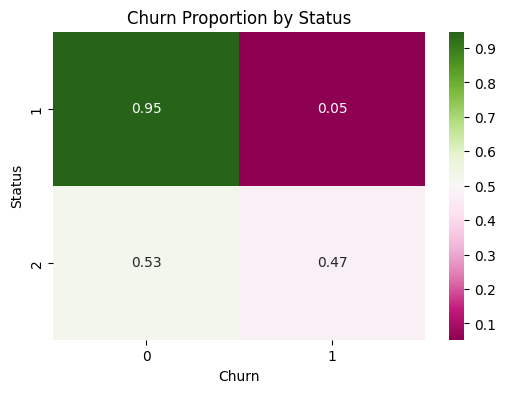

In [ ]:
crosstab = pd.crosstab(customer['Status'], customer['Churn'], normalize='index')
plt.figure(figsize=(6,4))
sns.heatmap(crosstab, annot=True, cmap="PiYG", fmt=".2f")
plt.title("Churn Proportion by Status")
plt.ylabel("Status")
plt.xlabel("Churn")
plt.show()

# Objective 2:

#Model Training and Evaluation

* Create X and y using a target column and split the dataset into train and test
* Train Random Forest Classifier on the training set.
* Make prediction using a testing test
* Display classification report


In [ ]:
import shap
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

# Features & target
X = customer.drop("Churn", axis=1)  # Independent variables
y = customer.Churn                  # Dependent variable

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=1
)

# Train model
clf = RandomForestClassifier()
clf.fit(X_train, y_train)

# Predictions & report
y_pred = clf.predict(X_test)
print(classification_report(y_pred, y_test))

              precision    recall  f1-score   support

           0       0.97      0.97      0.97       813
           1       0.80      0.82      0.81       132

    accuracy                           0.95       945
   macro avg       0.89      0.89      0.89       945
weighted avg       0.95      0.95      0.95       945



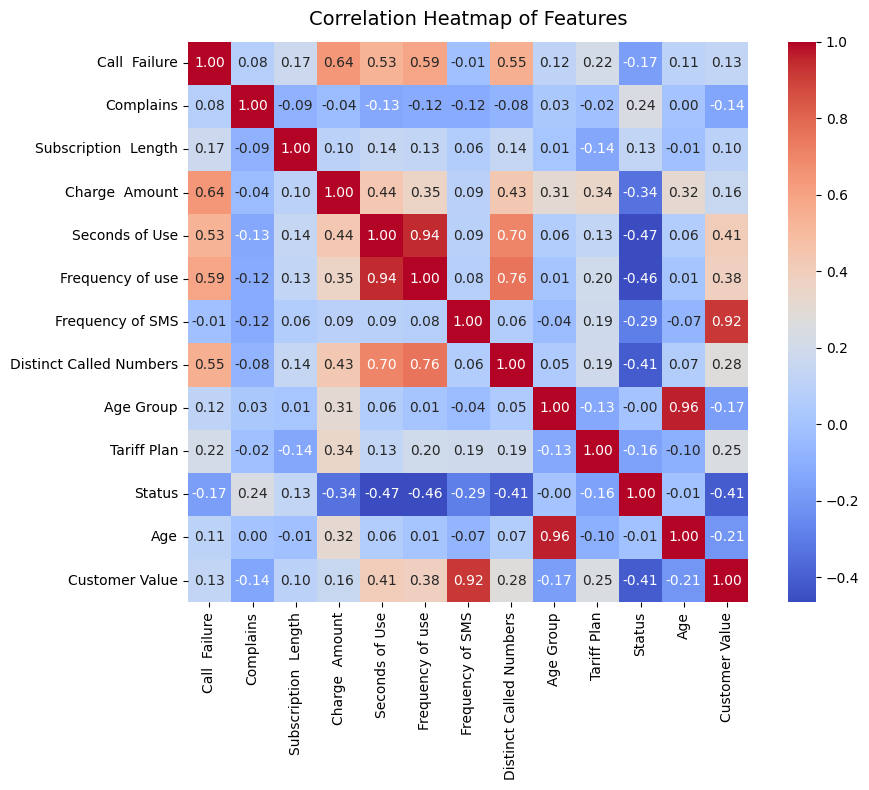

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Calculate correlation matrix
corr_matrix = X_test.corr()

# Set up the figure
plt.figure(figsize=(10,8))

# Draw the heatmap
sns.heatmap(
    corr_matrix,
    annot=True,          # show correlation values
    fmt=".2f",           # limit to 2 decimal places
    cmap="coolwarm",     # color scheme
    cbar=True,
    square=True
)

plt.title("Correlation Heatmap of Features", fontsize=14, pad=12)
plt.tight_layout()
plt.show()


#Setting up SHAP Explainer for Transpose and display summary plot in bar chart

Now comes the model explainer part.

We will first create an explainer object by providing a random forest classification model, then calculate SHAP value using a testing set.

 95%|=================== | 1804/1890 [00:22<00:01]       

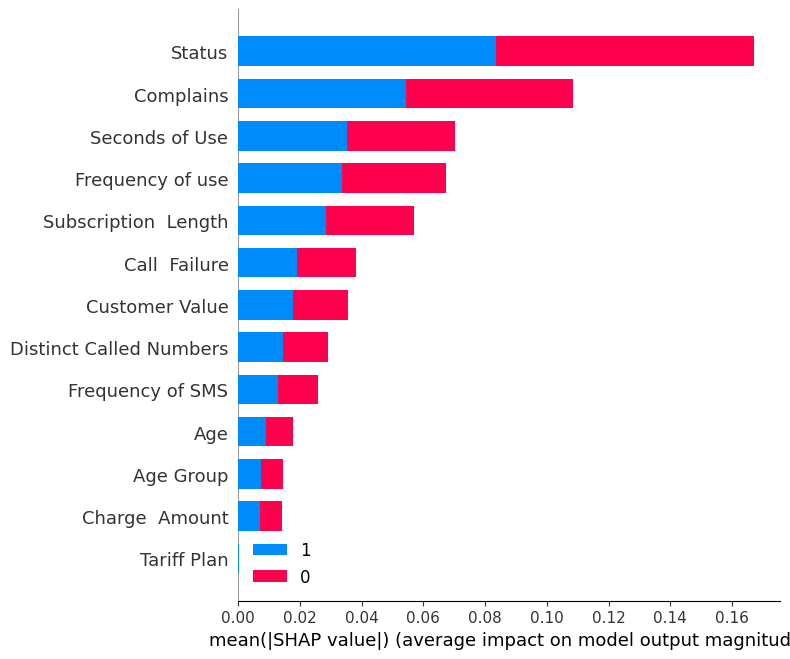

In [ ]:
# SHAP Explainer
explainer = shap.Explainer(clf, X_train)
shap_values = explainer.shap_values(X_test)  # Shape: (945, 13, 2)

# Transpose to (n_classes, n_samples, n_features)
shap_values_transposed = shap_values.transpose(2, 0, 1)  # Shape: (2, 945, 13)

# Convert to list of per-class arrays
shap_values_list = [
    shap_values_transposed[i] for i in range(shap_values_transposed.shape[0])
]

# Plot SHAP values per class (bar plot of mean abs SHAP values)
shap.summary_plot(
    shap_values_list,
    features=X_test,
    class_names=y_train.unique(),
    plot_type='bar'
)

In [ ]:
import pandas as pd
import numpy as np

# SHAP Explainer
explainer = shap.Explainer(clf, X_train)
shap_values = explainer.shap_values(X_test)  # Shape: (945, 13, 2)

# Extract SHAP values only for churn class (index = 1)
shap_values_churn = shap_values[:, :, 1]   # Shape: (945, 13)

# Compute mean absolute SHAP values per feature
mean_abs_shap = np.abs(shap_values_churn).mean(axis=0)

# Create DataFrame
shap_importance = pd.DataFrame({
    "Feature": X_test.columns,
    "Mean |SHAP value|": mean_abs_shap
}).sort_values(by="Mean |SHAP value|", ascending=False).reset_index(drop=True)

# Display
shap_importance


 98%|===================| 1851/1890 [00:21<00:00]       

,Feature,Mean |SHAP value|
0,Status,0.083590
1,Complains,0.054259
2,Seconds of Use,0.035122
3,Frequency of use,0.033672
4,Subscription Length,0.028441
5,Call Failure,0.019119
6,Customer Value,0.017760
7,Distinct Called Numbers,0.014599
8,Frequency of SMS,0.012865
9,Age,0.008876


#Waterfall Plot

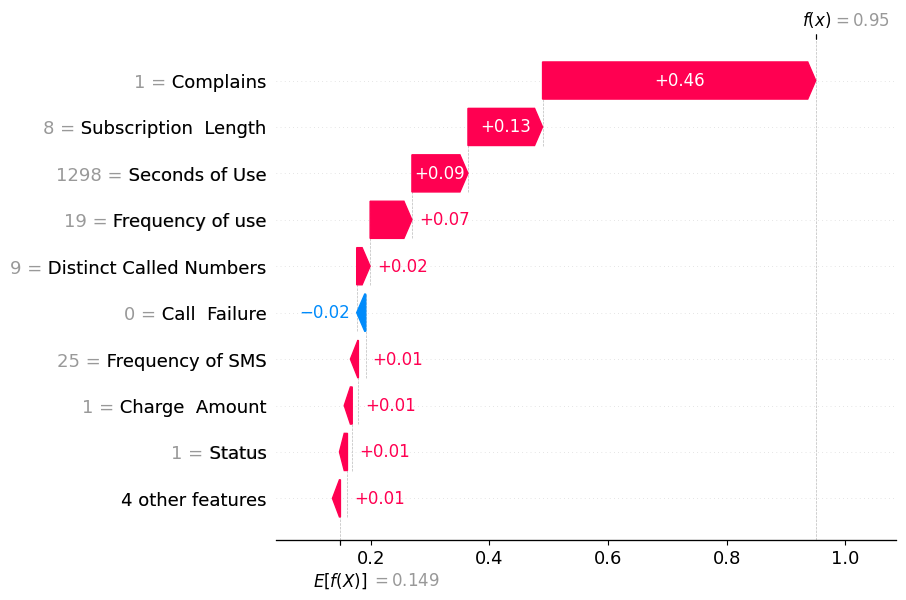

In [ ]:
# Select SHAP values for class 1 (Churn)
shap_values_class1 = shap_values[:, :, 1]  # shape: (945, 13)

# Choose one sample index (e.g., first row in X_test)
sample_index = 6

# Create an Explanation object for this sample
expl = shap.Explanation(
    values = shap_values_class1[sample_index],   # SHAP values for this row
    base_values = explainer.expected_value[1],   # expected value for class 1
    data = X_test.iloc[sample_index],            # feature values for this row
    feature_names = X_test.columns               # feature names
)

# Waterfall plot
shap.plots.waterfall(expl)


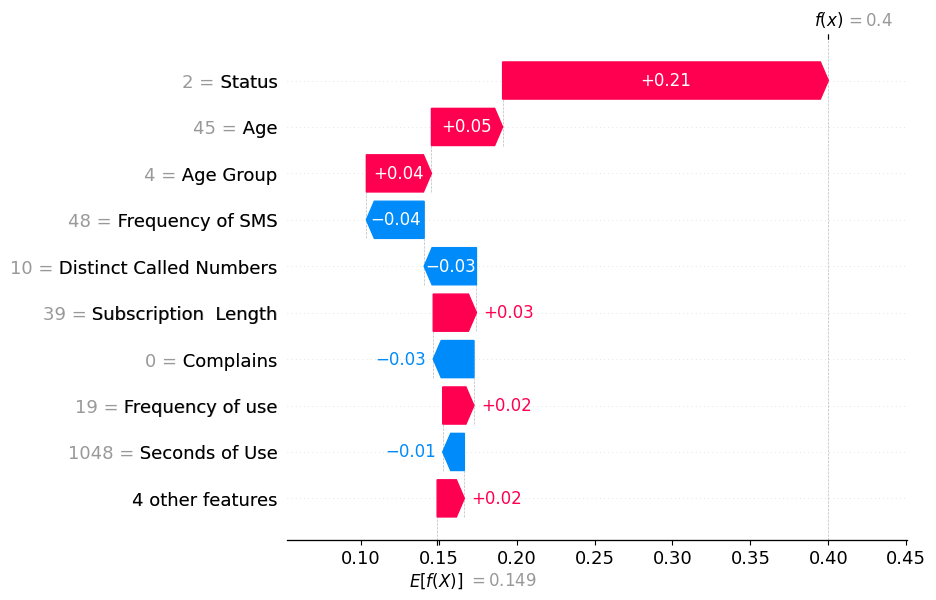

In [ ]:
# Select SHAP values for class 1 (Churn)
shap_values_class1 = shap_values[:, :, 1]  # shape: (945, 13)

# Choose one sample index (e.g., first row in X_test)
sample_index = 18

# Create an Explanation object for this sample
expl = shap.Explanation(
    values = shap_values_class1[sample_index],   # SHAP values for this row
    base_values = explainer.expected_value[1],   # expected value for class 1
    data = X_test.iloc[sample_index],            # feature values for this row
    feature_names = X_test.columns               # feature names
)

# Waterfall plot
shap.plots.waterfall(expl)

#Summary Plot

Display the summary_plot using SHAP values and testing set.

## X-axis (SHAP value):

* Positive SHAP values → push prediction towards churn (1).

* Negative SHAP values → push prediction towards non-churn (0).

## Y-axis (Name of the feature)
* feature names in order of importance from top to bottom

* Each dot: one customer.

* Color = feature value (red = high value, blue = low value).



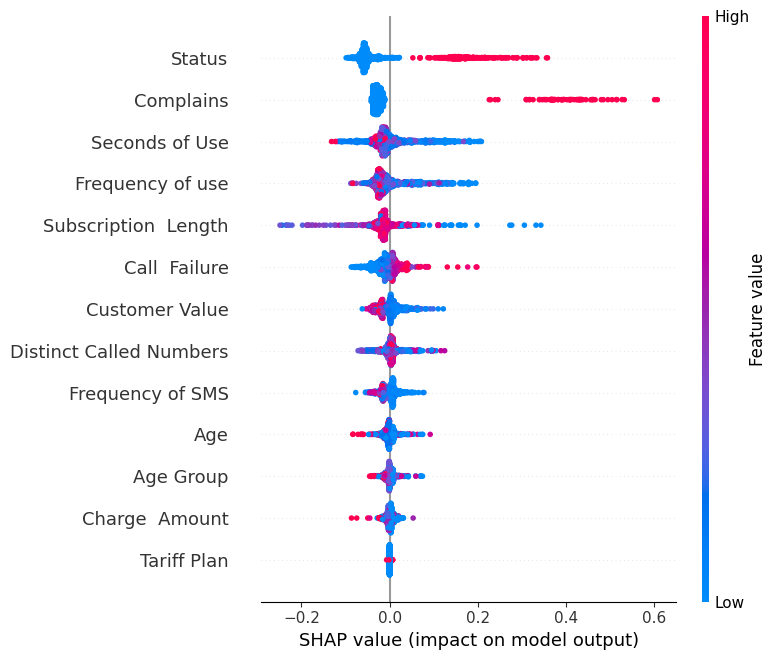

In [ ]:
shap_values_class1 = shap_values[:, :, 1]
shap.summary_plot(shap_values_class1, X_test)

# Dependence Plot

Visualise the dependence_plot for Status, complains and frequency of use

In [ ]:
print(X_test.columns.tolist())

['Call  Failure', 'Complains', 'Subscription  Length', 'Charge  Amount', 'Seconds of Use', 'Frequency of use', 'Frequency of SMS', 'Distinct Called Numbers', 'Age Group', 'Tariff Plan', 'Status', 'Age', 'Customer Value']


In [ ]:
print(shap_values_class1.shape)
print(X_test.shape)

(945, 13)
(945, 13)


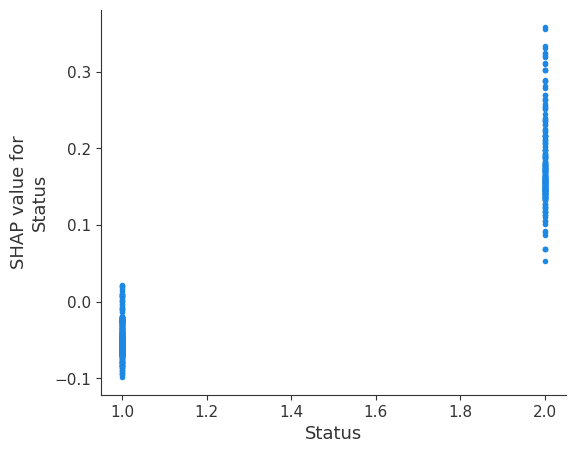

In [ ]:
# Dependence plot for Status

shap.dependence_plot(10, shap_values_class1, X_test, interaction_index=None)

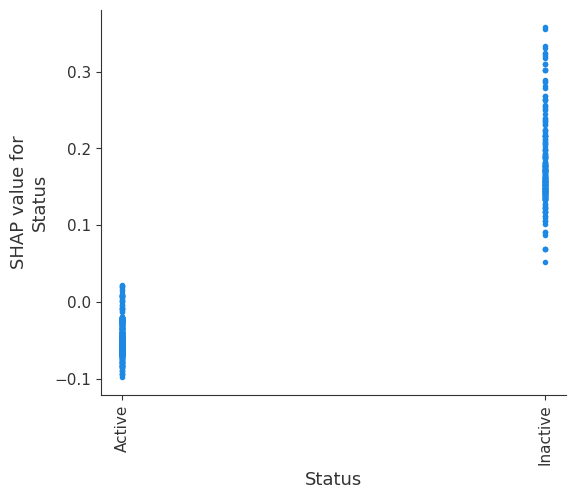

In [ ]:
# Map Status values into labels
status_map = {1: "Active", 2: "Inactive"}
X_test_plot = X_test.copy()
X_test_plot["Status"] = X_test_plot["Status"].map(status_map)

# Use feature name instead of index
shap.dependence_plot("Status", shap_values_class1, X_test_plot, interaction_index=None)


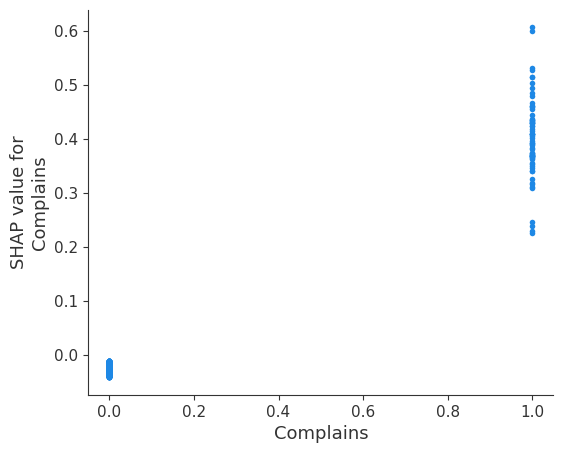

In [ ]:
shap.dependence_plot(1, shap_values_class1, X_test, interaction_index=None)

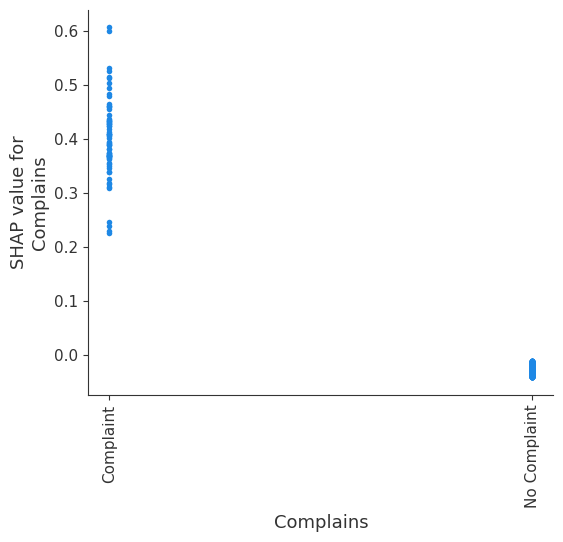

In [ ]:
# Map Status values into labels
status_map = {0: "No Complaint", 1: "Complaint"}
X_test_plot = X_test.copy()
X_test_plot["Complains"] = X_test_plot["Complains"].map(status_map)

# Use feature name instead of index
shap.dependence_plot("Complains", shap_values_class1, X_test_plot, interaction_index=None)

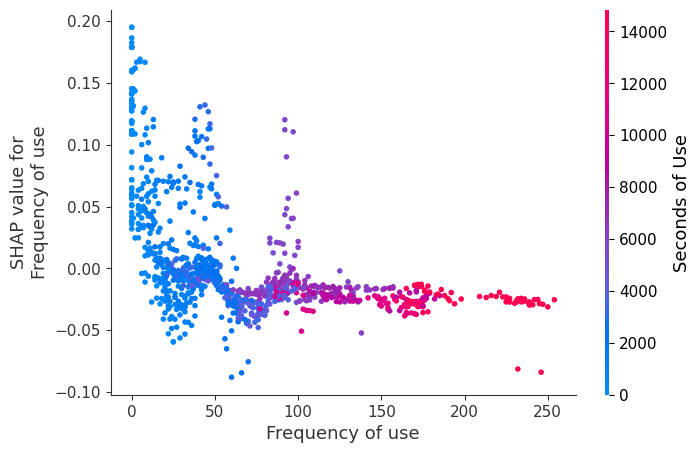

In [ ]:
shap.dependence_plot(5, shap_values_class1, X_test, interaction_index=4)

# Force Plot

We will examine the first sample in the testing set to determine which features contributed to the "1" result. To do this, we will utilize a force plot and provide the expected value, SHAP value, and testing sample.

Let’s look at customer churn samples with label “1”.

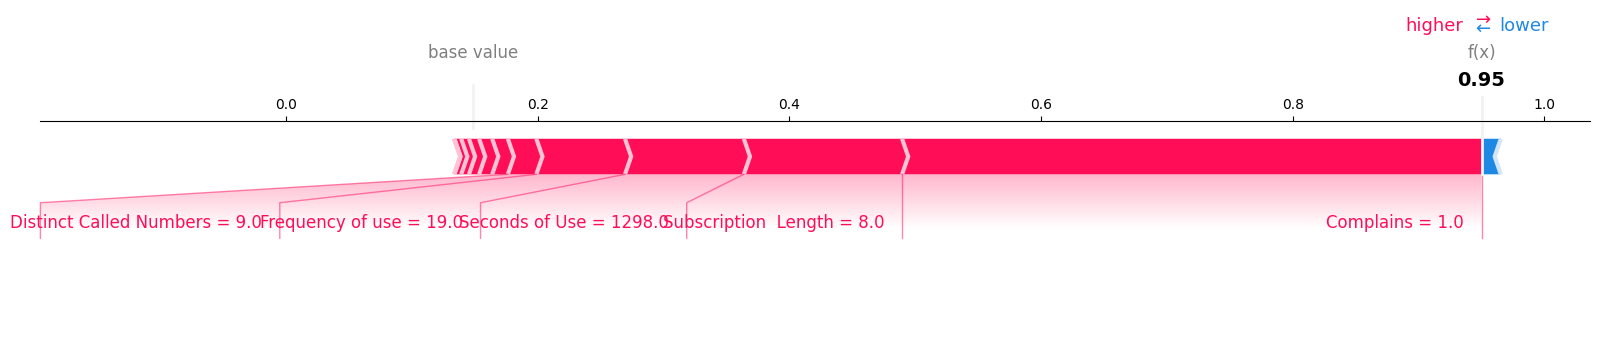

In [ ]:
shap.plots.force(
    explainer.expected_value[1],        # base value for class 1 (churn)
    shap_values_class1[6, :],           # SHAP values for sample 6
    X_test.iloc[6, :],                  # features for sample 6
    matplotlib=True
)


Force plot for row 1 (Actual label: 0)


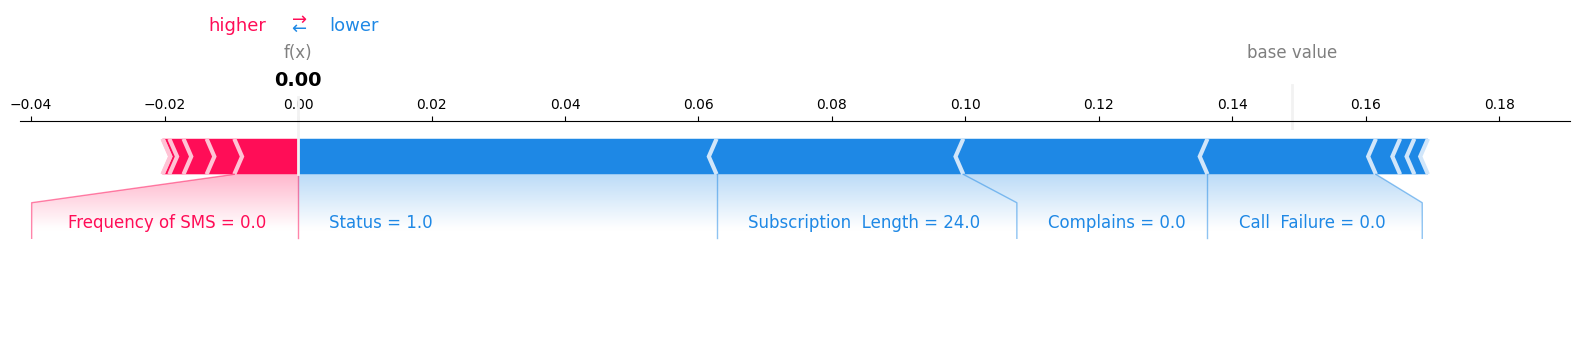

Force plot for row 6 (Actual label: 1)


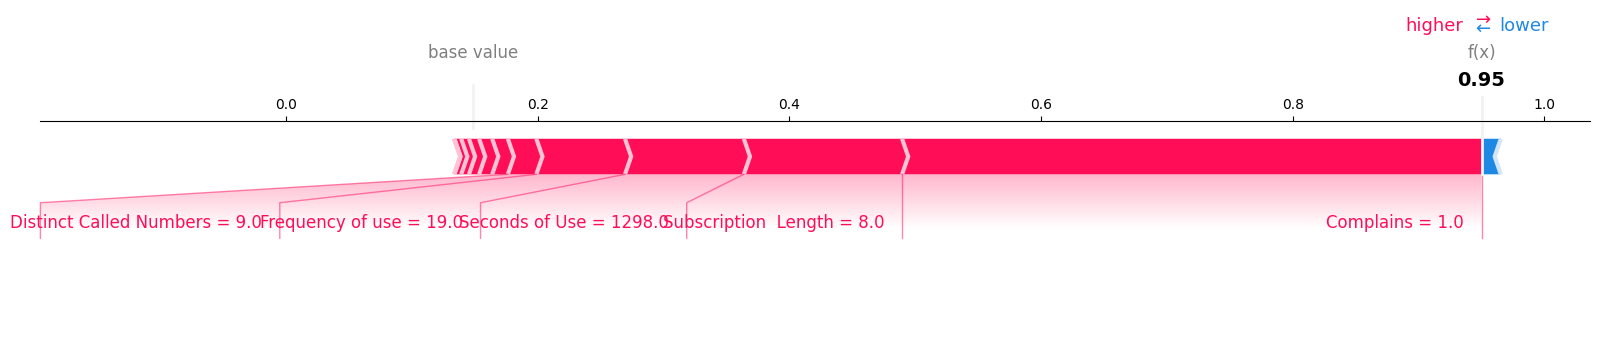

Force plot for row 10 (Actual label: 0)


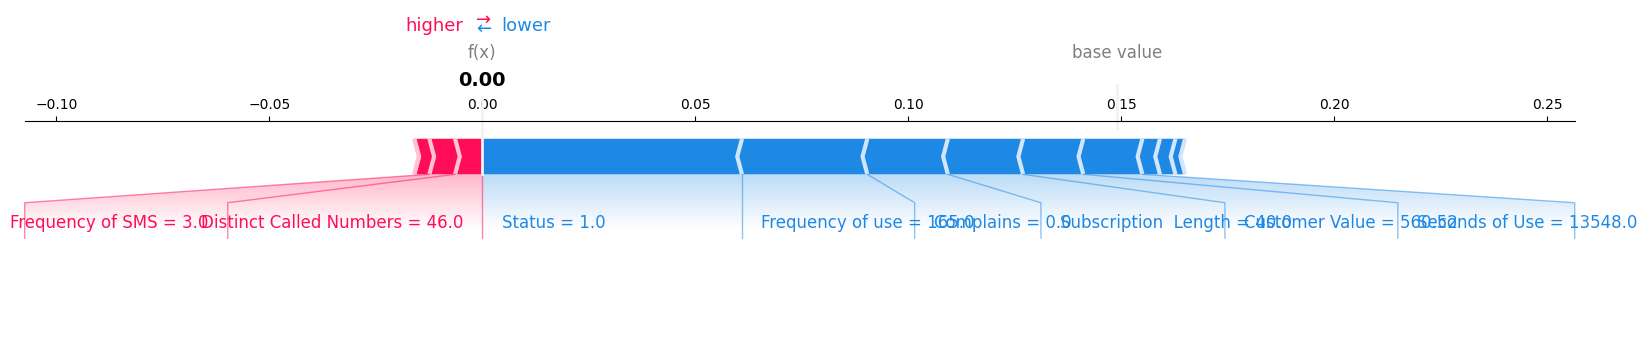

Force plot for row 18 (Actual label: 1)


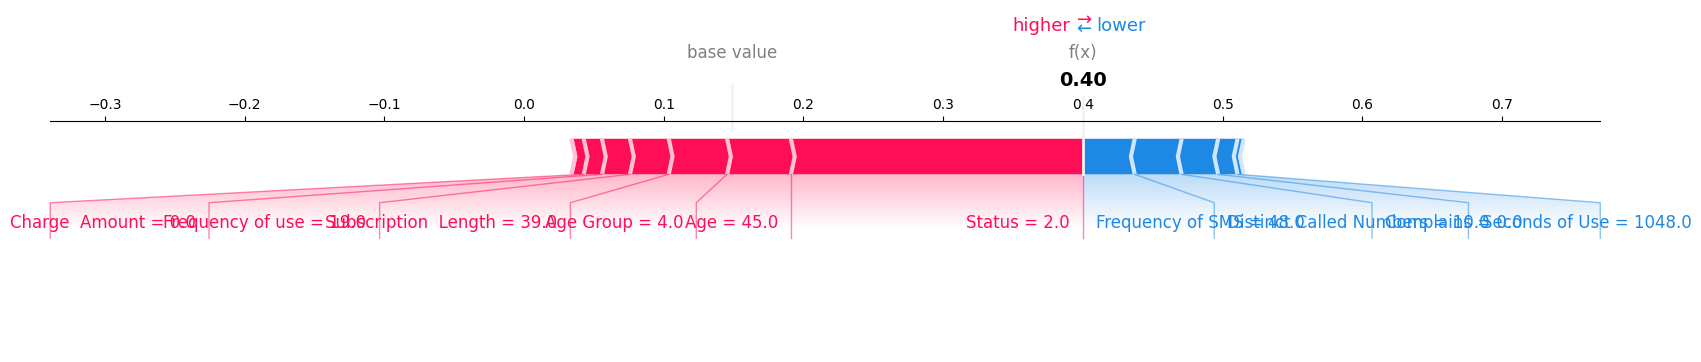

In [ ]:
import shap

# Function to show force plot for a given row
def show_force_plot(row_idx):
    shap.plots.force(
        explainer.expected_value[1],       # baseline for churn class
        shap_values_class1[row_idx, :],    # SHAP values for this row
        X_test.iloc[row_idx, :],           # feature values for this row
        matplotlib=True
    )

# Example: show force plot for rows 6, 15, 25
for idx in [1, 6, 10, 18]:
    print(f"Force plot for row {idx} (Actual label: {y_test.iloc[idx]})") #y_test.iloc[idx] = their actual label (0 = non-churned, 1 = churned)
    show_force_plot(idx)


In [ ]:
#SHAP value for force plot

row_idx = 1  # your example row
shap_row = pd.Series(shap_values_class1[row_idx, :], index=X_test.columns)
print("SHAP value:", shap_row["Seconds of Use"])  # should be negative
shap_row.abs().sort_values(ascending=False).head(10)


SHAP value: 0.000995584597112611


,0
Status,0.062718
Subscription Length,0.036966
Complains,0.036594
Call Failure,0.025239
Frequency of SMS,0.009556
Customer Value,0.004146
Frequency of use,0.003627
Distinct Called Numbers,0.003464
Age Group,0.002132
Charge Amount,0.002124


# Decision Plot

We will now display the decision_plot. It visually depicts the model decisions by mapping the cumulative SHAP values for each prediction.

Each plotted line on the decision plot shows how strongly the individual features contributed to a single model prediction, thus explaining what feature values pushed the prediction.

Note: The target label “1” decision plot is tilted towards “1”.

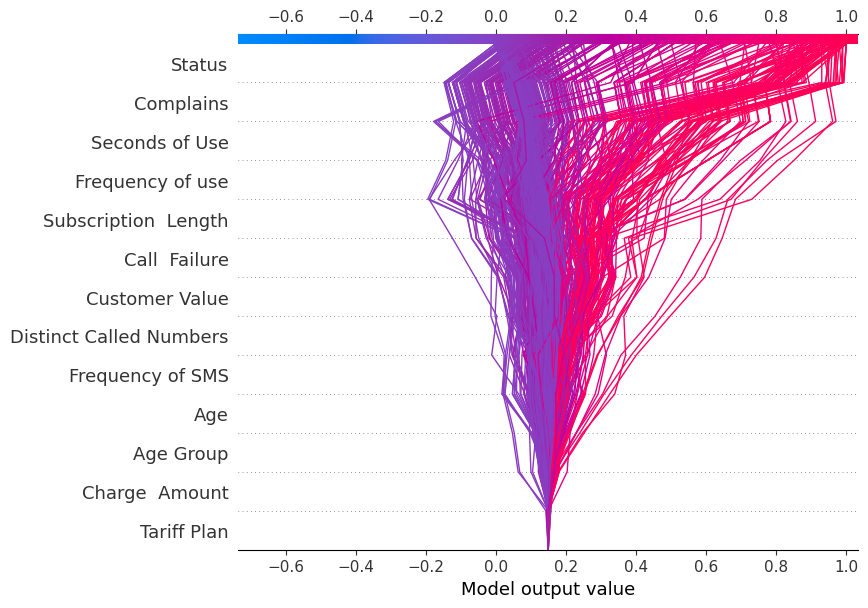

In [ ]:
# Global View

shap.decision_plot(
    explainer.expected_value[1],   # base value for churn
    shap_values_class1,            # SHAP values for all rows
    X_test                         # feature values (must match shape)
)


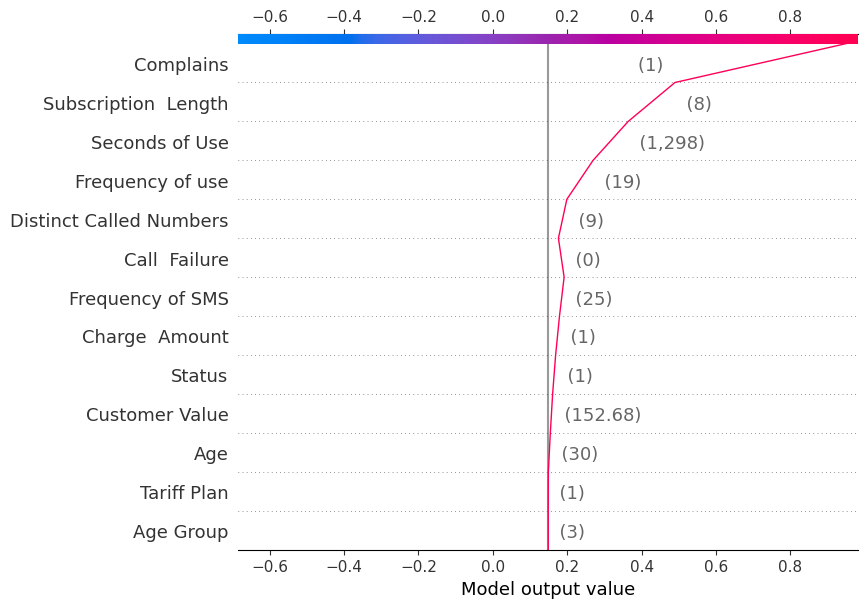

In [ ]:
# Local View for 1 customer in row 6

shap.decision_plot(
    explainer.expected_value[1],        # base value for churn
    shap_values_class1[6, :],           # SHAP values for one row
    X_test.iloc[6, :]                   # feature values for that row
)


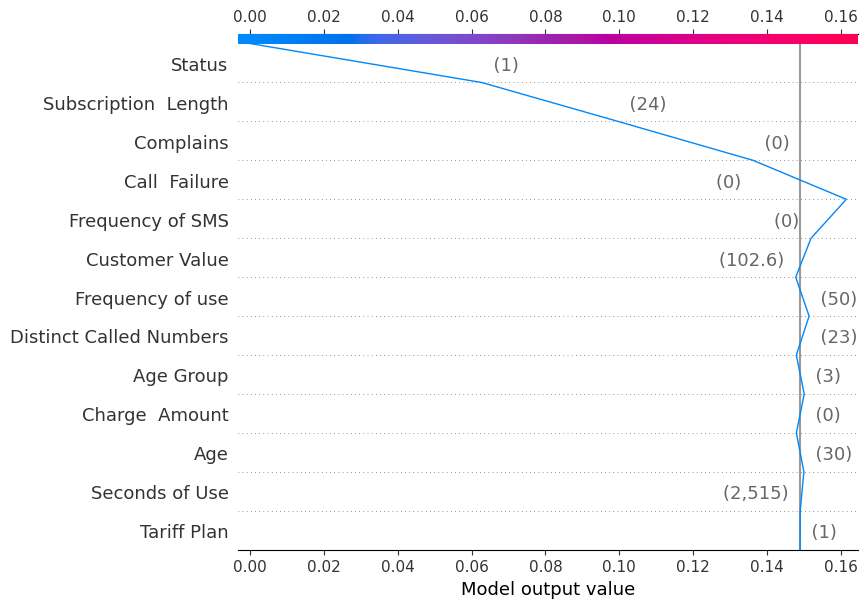

In [ ]:
# Local View for 1 customer in row 15

shap.decision_plot(
    explainer.expected_value[1],        # base value for churn
    shap_values_class1[1, :],           # SHAP values for one row
    X_test.iloc[1, :]                   # feature values for that row
)

[Source](https://www.datacamp.com/tutorial/introduction-to-shap-values-machine-learning-interpretability)